Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import torch
from torch.utils.data import Dataset,DataLoader
from sklearn.metrics import confusion_matrix,accuracy_score
import cv2#to read a multichannel image
import os

In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 46% 7.00M/15.1M [00:00<00:00, 71.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 95.1MB/s]


In [ ]:
path_to_zip_file = "/content/brain-mri-images-for-brain-tumor-detection.zip"
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

Reading The Images

In [ ]:
os.chdir("/Users/siddh/")  # Replace with your desired path
print(os.getcwd())  # Verify the change

C:\Users\siddh


In [ ]:
tumor = []
healthy = []
for f in glob.iglob("./brain_tumor_dataset/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

for f in glob.iglob("./brain_tumor_dataset/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [ ]:
healthy = np.array(healthy)
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))

In [ ]:
healthy.shape

(85, 128, 128, 3)

In [ ]:
tumor.shape

(86, 128, 128, 3)

In [ ]:
np.random.choice(10, 5, replace=False)

array([9, 3, 4, 8, 0])

In [ ]:
all =np.concatenate([healthy,tumor])

In [ ]:
all

array([[[[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        ...,

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
        

In [ ]:
all.shape

(171, 128, 128, 3)

Visualizing Brain MRI Images

In [ ]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

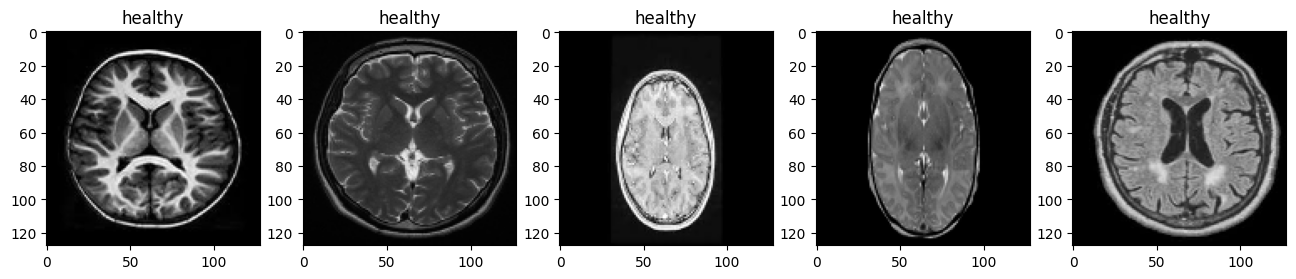

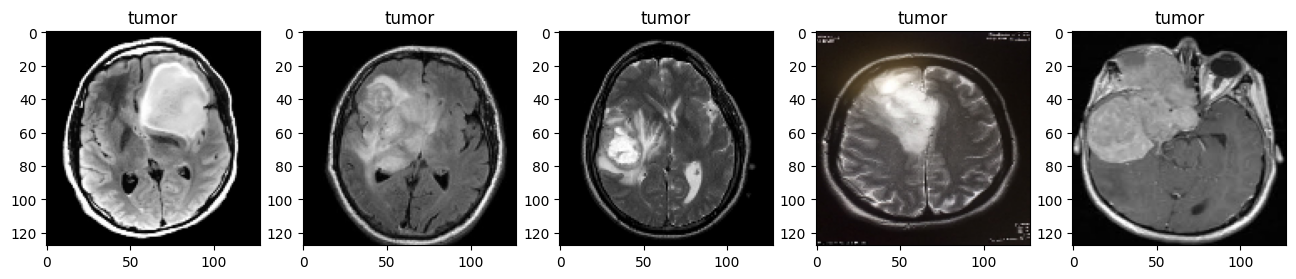

In [ ]:
plot_random(healthy, tumor, num=5)

# building model with **vgg16**

In [ ]:
# from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:07<00:00, 24.1MB/s]
100% 149M/149M [00:07<00:00, 20.6MB/s]


In [ ]:
path_to_zip_file = "/content/kjhkh.zip"
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

BadZipFile: File is not a zip file

In [ ]:
# augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    # rotation_range = 20,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # zoom_range = 0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    # validation_split=0.1
)

# train data
train_ds = datagen.flow_from_directory(
    '/content/Training',
    target_size=(150, 150),
    batch_size=40,
    class_mode='categorical'
)

# test data
validation_ds = datagen.flow_from_directory(
    '/content/Testing',
    target_size=(150, 150),
    batch_size=40,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# covolution base from vgg16 for feature extraction
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# for fine tuning
conv_base.trainable = True
for layer in conv_base.layers[-4:]:
    layer.trainable = True

In [ ]:
# model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       1,638,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,354,892 (62.39 MB)

 Trainable params: 16,354,492 (62.39 MB)

 Non-trainable params: 400 (1.56 KB)

In [ ]:
# adam = Adam(learning_rate=1e-5)
rmsprop = RMSprop(learning_rate=1e-5)
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=12, validation_data=validation_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 563ms/step - accuracy: 0.7807 - loss: 0.5644 - val_accuracy: 0.8856 - val_loss: 0.4255
Epoch 2/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.9460 - loss: 0.1691 - val_accuracy: 0.9336 - val_loss: 0.2003
Epoch 3/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 47s 330ms/step - accuracy: 0.9743 - loss: 0.0952 - val_accuracy: 0.9611 - val_loss: 0.1355
Epoch 4/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 338ms/step - accuracy: 0.9847 - loss: 0.0570 - val_accuracy: 0.9802 - val_loss: 0.0764
Epoch 5/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 338ms/step - accuracy: 0.9932 - loss: 0.0309 - val_accuracy: 0.9756 - val_loss: 0.0725
Epoch 6/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 338ms/step - accuracy: 0.9973 - loss: 0.0206 - val_accuracy: 0.9878 - val_loss: 0.0419
Epoch 7/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 338ms/step - accuracy: 0.9985 - loss: 0.0114 - val_accuracy: 0.9855 - val_loss: 0.0570
Epoch 8/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 339ms/step - accuracy: 0.9995 - loss: 

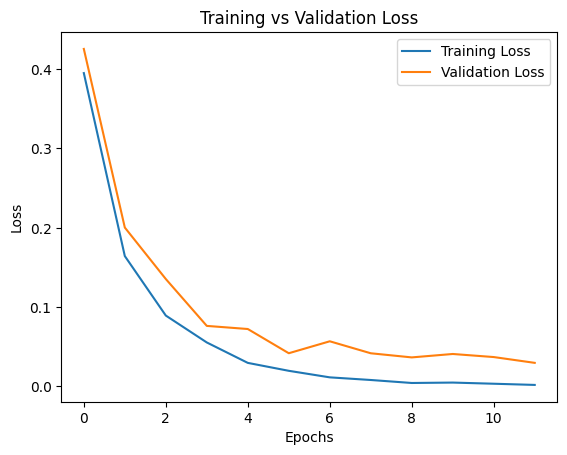

In [ ]:

import matplotlib.pyplot as plt

# visualizing training and validation loss overtime

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

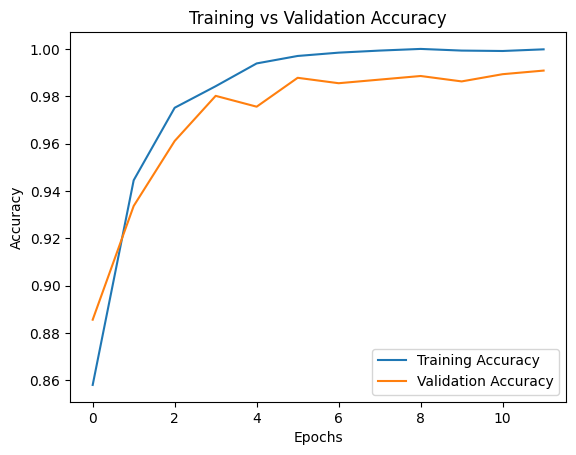

In [ ]:
# visualizing training and validation accuracy overtime

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# conclusion: model overfits, reason: limited amount of data

In [ ]:
model.save('brain_tumor_model.keras')